# DSPIN Tutorial (Program DSPIN with high spin number) v0

In [1]:
import numpy as np
from tqdm import tqdm
import anndata as ad
import sys
import matplotlib.pyplot as plt
import scanpy as sc
from scipy.io import savemat, loadmat
import os
import pandas as pd

**Please make sure the current path is parallel with the folder "util"** 

Use other ways to import DSPIN class otherwise.

In [2]:
sys.path.append("..")
from util.dspin_abstract import DSPIN
import util.plot as plot

/Users/ygong/git/DSPIN-abstract/test/../util/compute.py:374: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


## Preprocessing Should be Done Before Using DSPIN

### Load Data

In [3]:
data_folder = '../data/thomsonlab_signaling/'
large_data_folder = '../large_data/thomsonlab_signaling/'

In [11]:
cadata = ad.read_h5ad(large_data_folder + 'thomsonlab_signaling_filtered_2500_scvi_umap.h5ad')

/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


### Select Random Samples

In [12]:
cell_select = np.random.choice(cadata.shape[0], 10000, replace=False)
gene_select = np.random.choice(cadata.shape[1], 500, replace=False)
cadata = cadata[cell_select, :][:, gene_select].copy()
cadata.write(large_data_folder + 'thomsonlab_signaling_filtered_2500_scvi_umap_small.h5ad')

In [13]:
cadata = ad.read_h5ad(large_data_folder + 'thomsonlab_signaling_filtered_2500_scvi_umap_small.h5ad')
save_path = "./test/test_signalling_1014/"

/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
samp_list = np.unique(cadata.obs['sample_id'])
subset_list = samp_list[: 3]

## Initialize a DSPIN Object

When a DSPIN instance is initialized, based on the comparison between the number of spin and the 
number of genes of the anndata, it automatically initiates a GeneDSPIN or a ProgramDSPIN. In the following example, a ProgramDSPIN is iniatialized. The major difference between GeneDSPIN and ProgramDSPIN is that the later requires ONMF to cluster gene programs.

In [15]:
num_spin = 30
model = DSPIN(cadata, save_path, num_spin=num_spin)

497 genes have expression in more than 0.02 of the cells
Saving path does not exist. Creating a new folder.
ProgramDSPIN initialized.


## Gene Program Discovery

In [16]:
model.gene_program_discovery(balance_obs='leiden')

Computing ONMF decomposition...


Iteration Progress: 100%|██████████| 100/100 [00:03<00:00, 31.11it/s, Reconstruction Error=2603.62]


## Network Inference
Please set sample_col_name be the column name for sample id

An example list (optional) is a subset of all sample ids.

In [17]:
model.network_infer(sample_col_name='sample_id', example_list=subset_list)

Using pseudo_likelihood for network inference.


/Users/ygong/git/DSPIN-abstract/test/../util/compute.py:374: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "pseudol_gradient" failed type inference due to: No implementation of function Function(<function mean at 0x103cc4ea0>) found for signature:
 
 >>> mean(array(float64, 2d, C), axis=Literal[int](1))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'array_mean': File: numba/np/arraymath.py: Line 426.
    With argument(s): '(array(float64, 2d, C), axis=int64)':
   Rejected as the implementation raised a specific error:
     TypingError: got an unexpected keyword argument 'axis'
  raised from /Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/numba/core/typing/templates.py:784

During: resolving callee type: Function(<function mean at 0x103cc4ea0>)
During: typing of call at /Users/ygong/git/DSPIN-abstract/test/../util/compute.py (412)


File "../util/compute.py", line 

Progress: 5, Network gradient: 3.360073
Progress: 10, Network gradient: 1.709082
Progress: 15, Network gradient: 1.002553
Progress: 20, Network gradient: 0.657261
Progress: 25, Network gradient: 0.434581
Progress: 30, Network gradient: 0.277234
Progress: 35, Network gradient: 0.176615
Progress: 40, Network gradient: 0.120397
Progress: 45, Network gradient: 0.083637
Progress: 50, Network gradient: 0.056393
Progress: 55, Network gradient: 0.038511
Progress: 60, Network gradient: 0.031255
Progress: 65, Network gradient: 0.024006
Progress: 70, Network gradient: 0.018849
Progress: 75, Network gradient: 0.015685
Progress: 80, Network gradient: 0.012442
Progress: 85, Network gradient: 0.010246
Progress: 90, Network gradient: 0.008262
Progress: 95, Network gradient: 0.006840
Progress: 100, Network gradient: 0.005652


## Network Plotting

In [18]:
gene_program_csv = model.gene_program_csv

The names for gene programs can be set by the user.
Otherwise, users can call function "temporary_spin_name" in plot.py to create names for gene programs
from the first five genes in each program.

In [19]:
gene_program_names = plot.temporary_spin_name(gene_program_csv)

In [20]:
network = model.network 

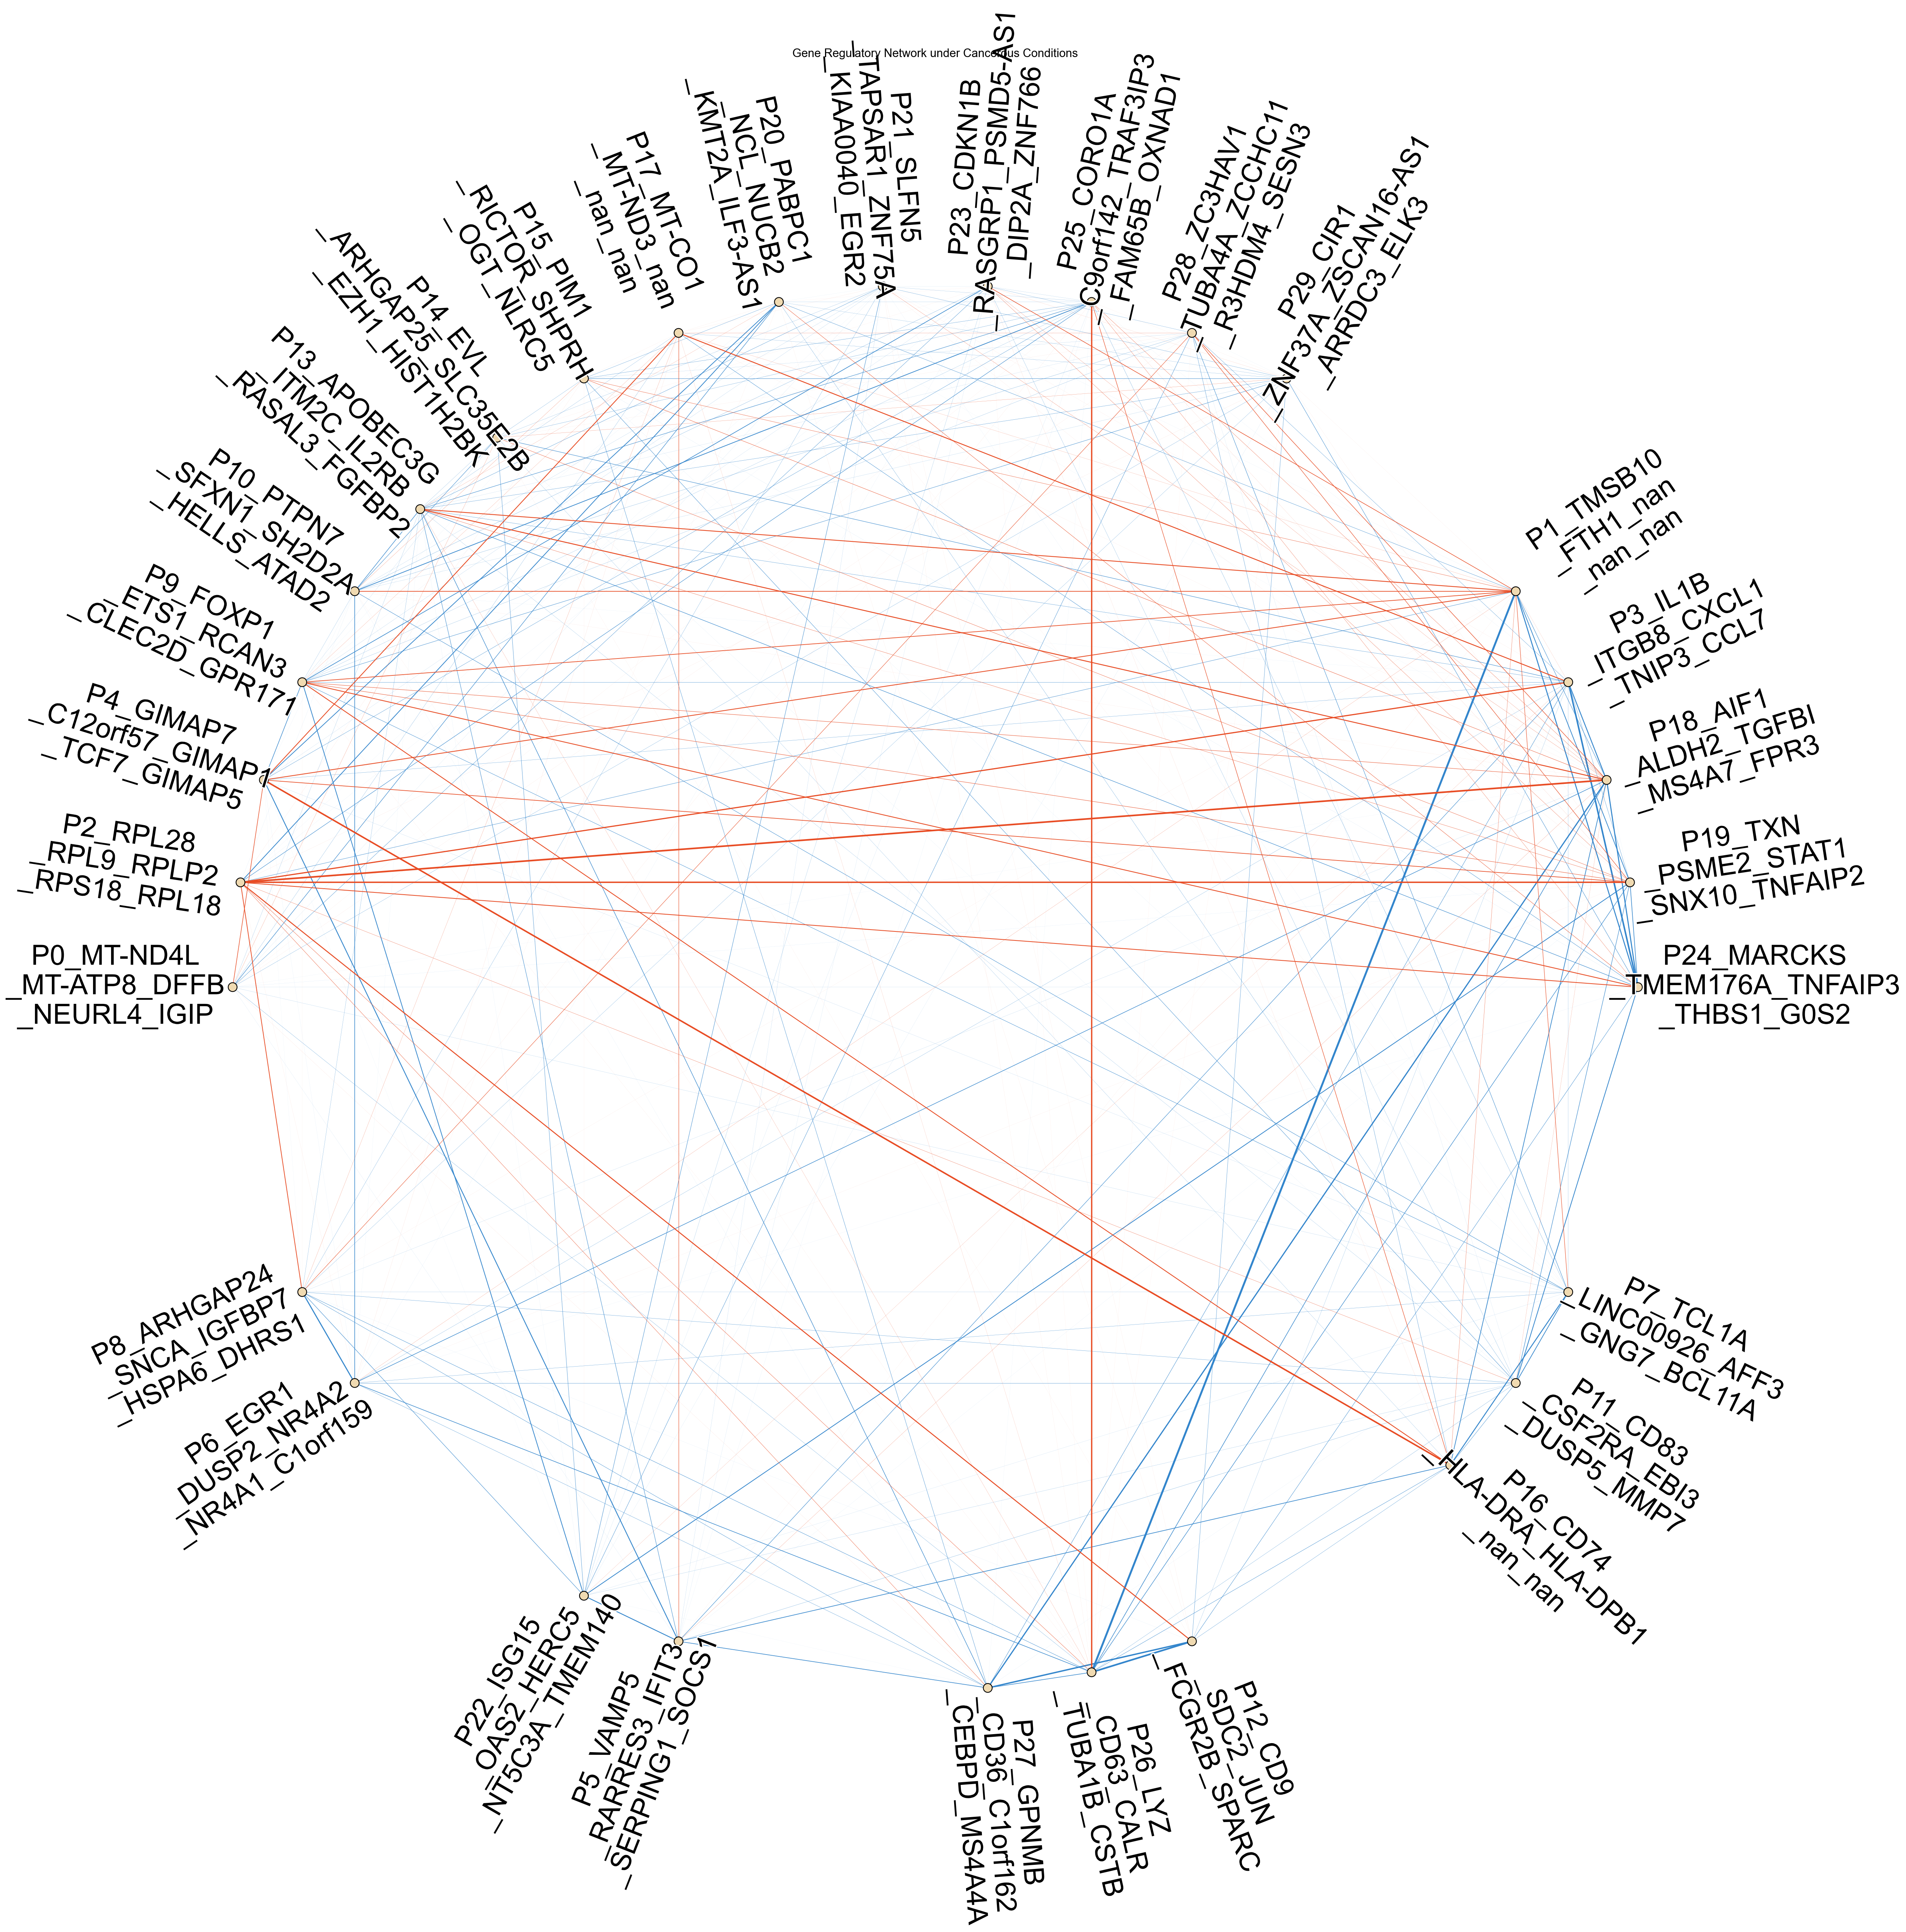

In [22]:
plot.plot_final(gene_program_name=gene_program_names, cur_j=network)